<a href="https://colab.research.google.com/github/Tina-Mulu/Carrefour-Market-Analysis-using-R-.-Unsupervised-Learning/blob/main/Anomaly_Detection_in_Supermarket_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 4: Anomaly Detection**



You have also been requested to check whether there are any anomalies in the given sales dataset. The objective of this task being fraud detection.

In [ ]:
# Installing anomalize package
# ---
# 
install.packages("anomalize")
library(anomalize)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘parallelly’, ‘TTR’, ‘prodlim’, ‘future’, ‘globals’, ‘later’, ‘quadprog’, ‘quantmod’, ‘gower’, ‘ipred’, ‘furrr’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘warp’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘xts’, ‘zoo’, ‘slider’, ‘anytime’, ‘timeDate’, ‘forecast’, ‘timetk’, ‘sweep’, ‘tibbletime’


══ Use anomalize to improve your Forecasts by 50%! ═════════════════════════════
Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.

In [ ]:
# reading in our data
sales <- read.csv('Supermarket_Sales_Forecasting - Sales.csv')
head(sales)

,Date,Sales
,<chr>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480
5,2/8/2019,634.3785
6,3/25/2019,627.6165


In [ ]:
#Convert date to Date column from string to date
#

sales$Date<- as.Date(sales$Date,format="%m/%d/%Y") 
glimpse(sales)

Rows: 1,000
Columns: 2
$ Date  <date> 2019-01-05, 2019-03-08, 2019-03-03, 2019-01-27, 2019-02-08, 201…
$ Sales <dbl> 548.9715, 80.2200, 340.5255, 489.0480, 634.3785, 627.6165, 433.6…


In [ ]:
#Converting dataset to tibble
#

sales <- as_tibble(sales)
head(sales)

Date,Sales
<date>,<dbl>
2019-01-05,548.9715
2019-03-08,80.2200
2019-03-03,340.5255
2019-01-27,489.0480
2019-02-08,634.3785
2019-03-25,627.6165


In [ ]:
#Aggregating sales values to get daily records

sales.agg <- aggregate(sales["Sales"], by=sales["Date"],sum)
head(sales.agg)

#Changing to tibble
sales.agg <- as.tibble(sales.agg)
head(sales.agg)

,Date,Sales
,<date>,<dbl>
1,2019-01-01,4745.181
2,2019-01-02,1945.503
3,2019-01-03,2078.128
4,2019-01-04,1623.688
5,2019-01-05,3536.684
6,2019-01-06,3614.205


Date,Sales
<date>,<dbl>
2019-01-01,4745.181
2019-01-02,1945.503
2019-01-03,2078.128
2019-01-04,1623.688
2019-01-05,3536.684
2019-01-06,3614.205


Converting from tbl_df to tbl_time.
Auto-index message: index = Date

frequency = 7 days

trend = 30 days

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



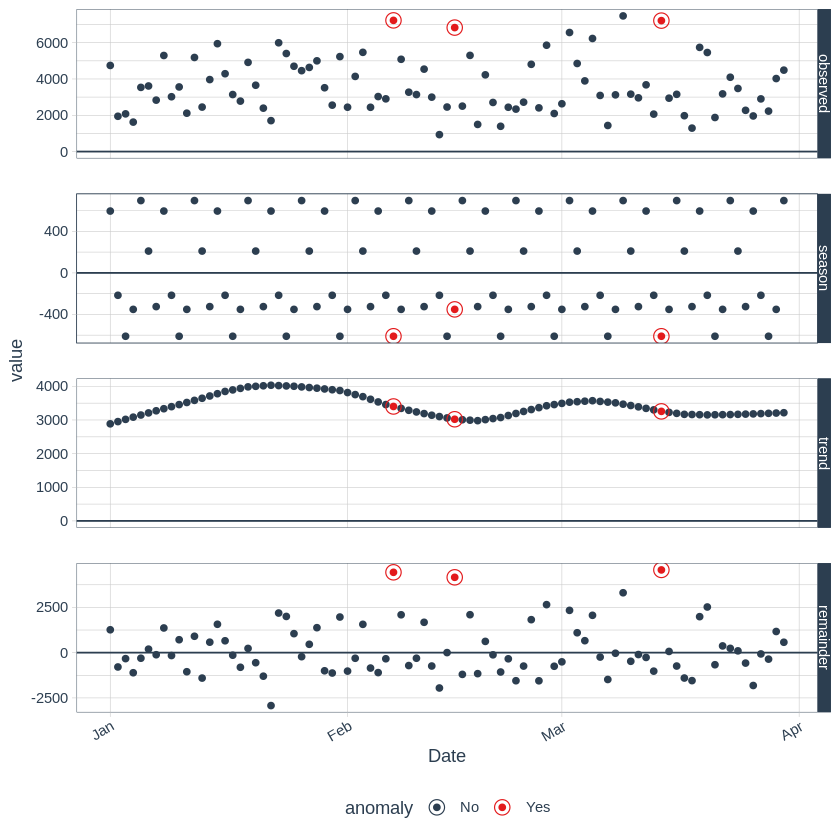

In [ ]:
#Anomaly detection algorithm
#

anomaly <- sales.agg  %>%
time_decompose(Sales, method = "stl", frequency = "auto", trend = "auto") %>%
anomalize(remainder, method = "gesd", alpha = 0.05, max_anoms = 0.1) %>%
plot_anomaly_decomposition()

#Plotting of anomalies
anomaly

# **Conclusion**

The data used here was from Carrefour Kenya to detect fraud.The red parts are the anomalies detected. the Supermarket heads can check on the specific dates and try to get reason for the anomalies.